<a href="https://colab.research.google.com/github/jesschannn/datasci_6b_regression/blob/main/datasci_6b_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

In [ ]:
!pip install ucimlrepo

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Importing in Dataset

In [35]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [36]:
df = pd.DataFrame(X)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [43]:
df.to_csv('heart_disease.csv', index=False)

# **Simple Linear Regression**

In [37]:
X = sm.add_constant(df['age'])
model = sm.OLS(df['chol'], X)

results = model.fit()

residuals = results.resid
fitted = results.fittedvalues

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     13.74
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           0.000250
Time:                        20:11:49   Log-Likelihood:                -1618.6
No. Observations:                 303   AIC:                             3241.
Df Residuals:                     301   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.5325     17.818     10.188      0.0

## Checking Assumptions

### Assessing Linearity

In [38]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9978384234038479, p-value=0.5055023698774269


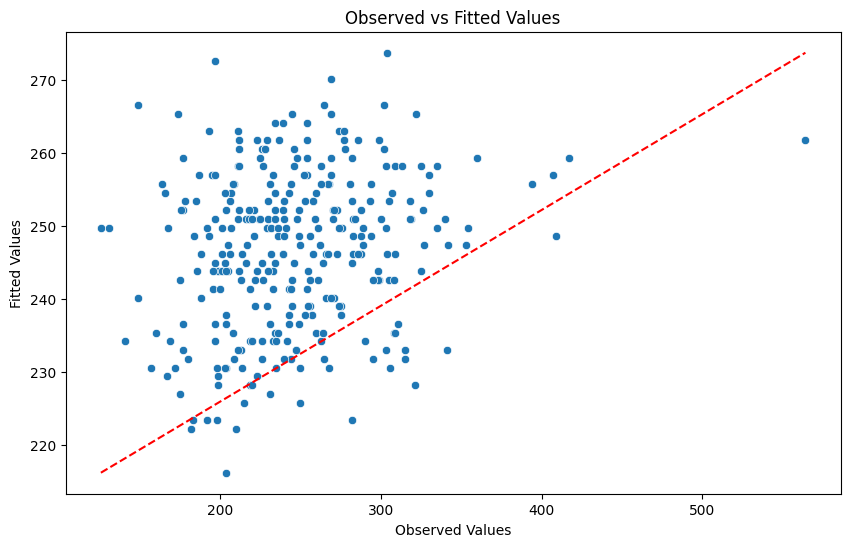

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['chol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['chol']), max(df['chol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

### Assessing Normality

In [40]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9537262916564941, p-value=3.43000152724926e-08


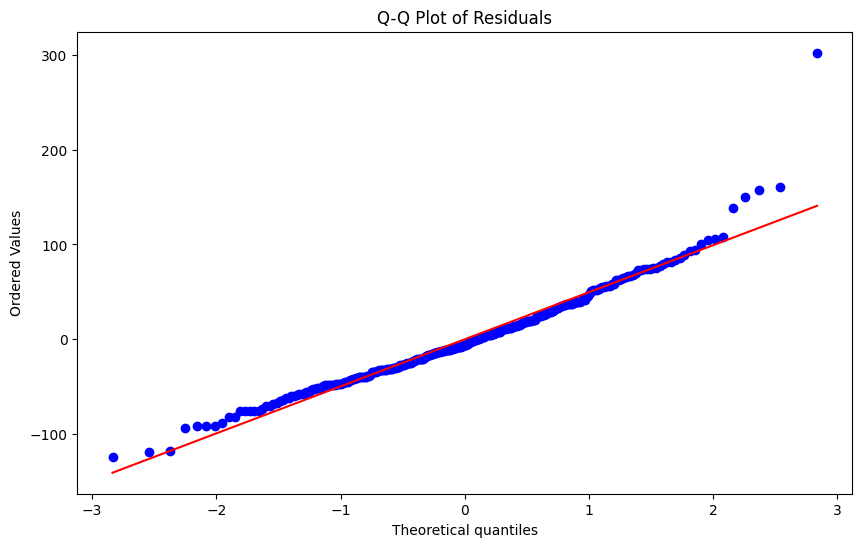

In [41]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Assessing Homogeneity

In [42]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.3799832930144131, p-value=0.024881131340494998


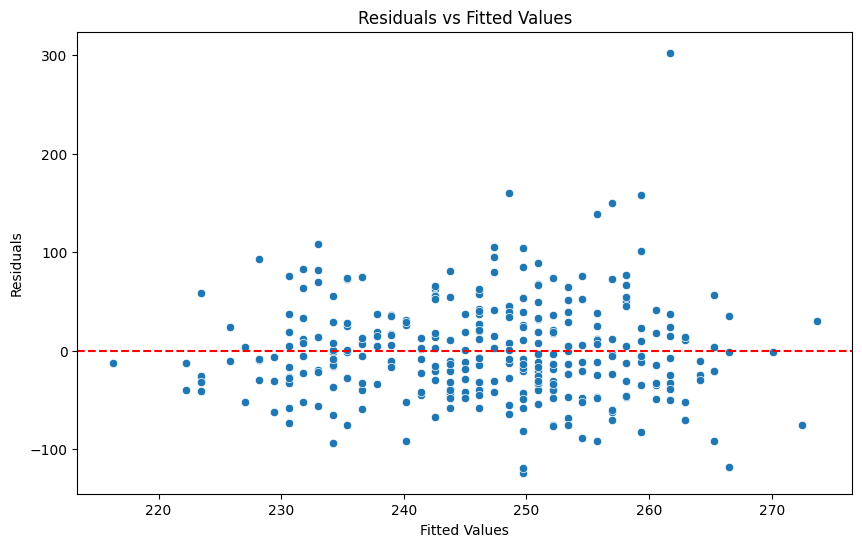

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### **Markdown Insights**

**Variable Choices**:

*   IV: Age
*   DV: Chol (serum cholesterol)

**Challenges**: I did not face any challenges

**Insights and Patterns from Regression Outcomes**:

*   OLS Regression Results

    The R-squared value determines the proportion of variance in the dependent variable that can be explained by the independent variable. Since the R-squared value was 0.044, this means that 4.4% of the variance in the "chol" data can be attributed to age. With a F-statistic of 0.00025, this means that the relationship between "chol" and age is statistically significant.

*   Rainbow Test for Linearity

    The purpose of a rainbow test is to determine the linearity in a regression model. Because the rainbow test produced a p-value of 0.5055, which is greater than the significance level of 0.05, then this means that the relationship between "chol" and age might be linear.


*   Shapiro-Wilks Test for Normality

    The purpose of a Shapiro-Wilks test is to determine if the data is normally distributed. Because the Shapiro-Wilks test produced a p-value of 3.43 e-8, which is less than the significance of level of 0.05, then this means that the data is not normally distributed.

* Goldfeld-Quandt Test for Homogeneity

  The purpose of a Goldfeld-Quant test is to determine if the variance of residuals is constant across all independent variables being measured. Because the Goldfeld-Quant test produced a p-value of 0.0249, which is less than the significance level of 0.05, then this means that the variance of residuals is not constant across all independent variables.



#**Multiple Linear Regression**

## Regression Model

In [46]:
X = df[['age', 'trestbps', 'chol', 'oldpeak']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['thalach']
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


residuals = results.resid
fitted = results.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     24.09
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.78e-17
Time:                        20:34:46   Log-Likelihood:                -1335.4
No. Observations:                 303   AIC:                             2681.
Df Residuals:                     298   BIC:                             2699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.3191     10.601     17.104      0.0

## Checking Assumptions

### Assessing Multicollinearity

In [49]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
   Variable        VIF
0     const  84.979034
1       age   1.153910
2  trestbps   1.116389
3      chol   1.051659
4   oldpeak   1.064148


### Assessing Linearity

In [47]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=0.9867709703176001, p-value=0.5327684141909239


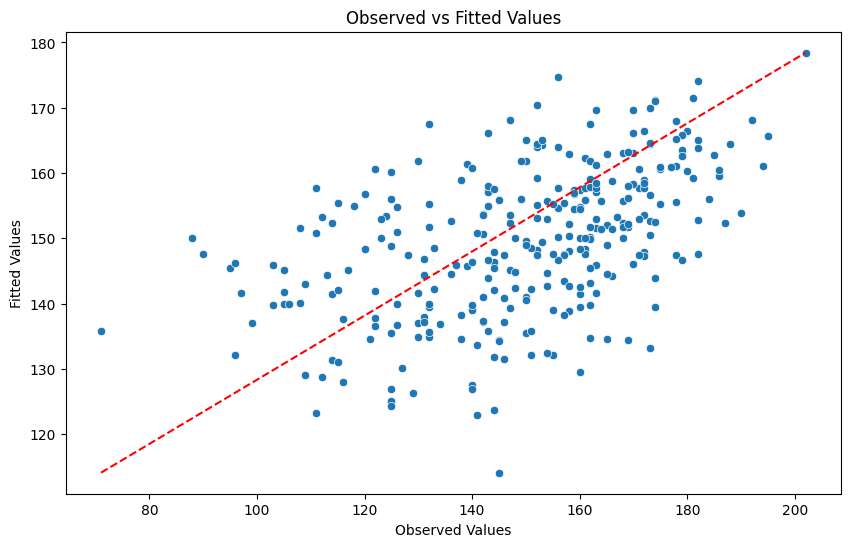

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['thalach'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['thalach']), max(df['thalach'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

### Assessing Normality

In [50]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9623565673828125, p-value=4.552937298285542e-07


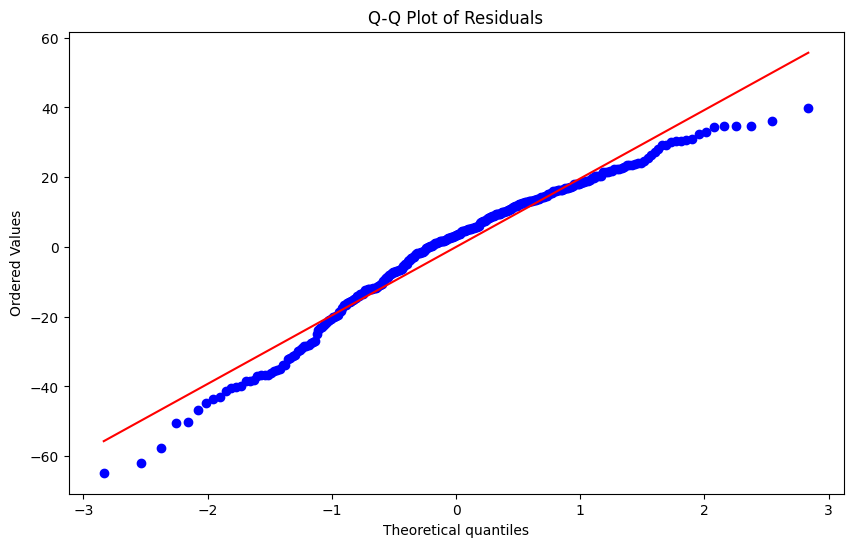

In [51]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Assessing Homogeneity

In [52]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=1.3254423270108222, p-value=0.04458118246069974


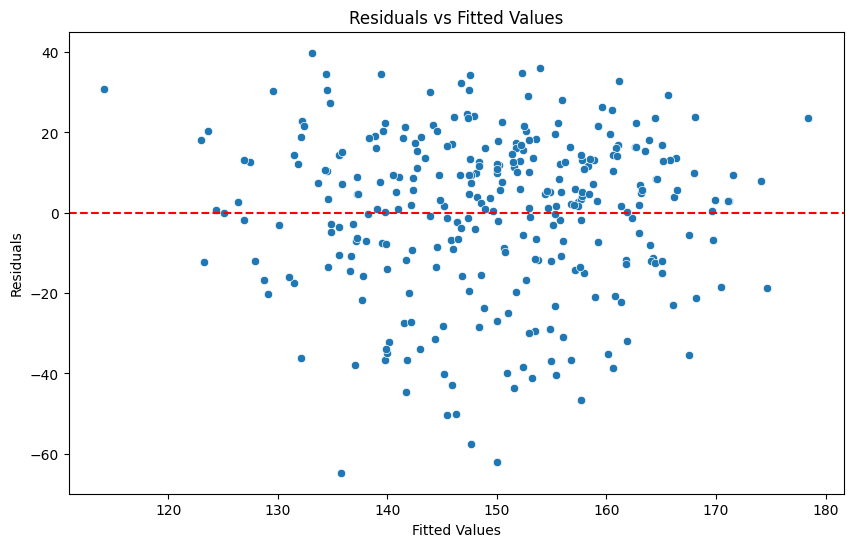

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### **Markdown Insights**

**Variables**

IV: Age, trestbps (resting BP on admission to hospital), chol (serum cholesterol), oldpeak (ST depression induced by exercise relative to rest)

DV: thalach (maximum heart rate)

**Challenges**: I did not face any challenges.

**Insights and Patterns from Regression Outcomes**

*   OLS Regression Results

  The R-squared value determines the proportion of variance in the dependent variable that can be explained by the independent variable. Since the R-squared value was 0.244, this means that 24.4% of the variance in the "thalach" data can be attributed to age, "trestbps", "chol", and "oldpeak". With a F-statistic of 2.78e-17, this means that the relationship between "thalach" and at least one of the independent variables is statistically significant.

*   Rainbow Test for Linearity

    The purpose of a rainbow test is to determine the linearity in a regression model. Because the rainbow test produced a p-value of ~0.987, which is greater than the significance level of 0.05, then this means that the relationship between "thalach" and one of the independent variables might be linear.


*   Shapiro-Wilks Test for Normality

    The purpose of a Shapiro-Wilks test is to determine if the data is normally distributed. Because the Shapiro-Wilks test produced a p-value of 4.55 e-7, which is less than the significance of level of 0.05, then this means that the data is not normally distributed.

* Goldfeld-Quandt Test for Homogeneity

  The purpose of a Goldfeld-Quant test is to determine if the variance of residuals is constant across all independent variables being measured. Because the Goldfeld-Quant test produced a p-value of ~0.0446, which is less than the significance level of 0.05, then this means that the variance of residuals is not constant across all independent variables.
